# Análisis Exploratorio de Datos: Clientes de un Centro Comercial

## Introducción

¡Bienvenido a este tutorial de análisis de datos! En este notebook, aprenderemos a realizar un **Análisis Exploratorio de Datos (EDA, por sus siglas en inglés)**. Este es el primer paso y uno de los más importantes en cualquier proyecto de ciencia de datos.

Nuestro objetivo es cargar un conjunto de datos sobre los clientes de un centro comercial y utilizar la poderosa librería `pandas` de Python para entenderlo a fondo. Descubriremos su estructura, sus características principales y buscaremos patrones iniciales.

**Dataset:** Utilizaremos el archivo `Mall_Customers.csv`, que contiene información demográfica y de comportamiento de los clientes.



## Paso 1: Preparación del Entorno de Trabajo

Antes de empezar, necesitamos asegurarnos de que nuestro código pueda ejecutarse en diferentes entornos, como Google Colab (en la nube) o Jupyter Notebook (en tu computadora).

El siguiente código detecta si estamos en Colab. Si es así, descargará automáticamente los datos necesarios desde un repositorio de GitHub.

In [10]:
# Propósito: Verificar si el notebook se está ejecutando en Google Colab.
# Esto nos permite adaptar el código para descargar los datos si es necesario.

# Instrucciones: Simplemente ejecuta esta celda. No requiere parámetros de entrada.

# Explicación del código:
# - 'try...except': Es una forma de manejar errores en Python.
#   - 'try': Intenta ejecutar el código que está dentro de este bloque.
#   - 'import google.colab': Esta librería solo existe en el entorno de Colab. Si la importación tiene éxito, significa que estamos en Colab.
#   - 'IN_COLAB = True': Creamos una variable llamada IN_COLAB y le asignamos el valor True.
#   - 'except': Si el bloque 'try' falla (porque la librería no existe), se ejecuta el código de este bloque.
#   - 'IN_COLAB = False': Asignamos el valor False a la variable, indicando que no estamos en Colab.

try:
    import google.colab
    IN_COLAB = True
    print("Entorno de Google Colab detectado.")
except:
    IN_COLAB = False
    print("Entorno local (o diferente a Colab) detectado.")

Entorno de Google Colab detectado.


In [11]:
# Propósito: Si estamos en Google Colab, este bloque descarga el conjunto de datos.
# Si no, se omite.

# Instrucciones: Ejecuta la celda. La descarga es automática si es necesario.

# Explicación del código:
# - 'if IN_COLAB:': Este código solo se ejecuta si la variable que creamos antes es True.
# - '!wget': Es un comando de sistema (no de Python) para descargar archivos de internet.
# - '!unzip': Descomprime el archivo .zip que descargamos.
# - '!mv': Mueve la carpeta de datos a una ubicación conocida.
# - '!rm -rf': Elimina los archivos y carpetas que ya no necesitamos para mantener limpio el entorno.

if IN_COLAB:
    print("Descargando y preparando los datos para Colab...")
    # Descargamos el repositorio completo como un archivo zip
    !wget -O datasets.zip https://github.com/ingrafaeln/Ciencia-de-Datos/archive/refs/heads/main.zip
    # Descomprimimos el archivo
    !unzip -q datasets.zip
    # Movemos la carpeta de datasets a una ubicación principal
    !mv Ciencia-de-Datos-main/datasets ./datasets_github
    # Limpiamos los archivos descargados que ya no son necesarios
    !rm -rf datasets.zip Ciencia-de-Datos-main
    print("Datos listos.")

Descargando y preparando los datos para Colab...
--2025-10-02 22:15:55--  https://github.com/ingrafaeln/Ciencia-de-Datos/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ingrafaeln/Ciencia-de-Datos/zip/refs/heads/main [following]
--2025-10-02 22:15:55--  https://codeload.github.com/ingrafaeln/Ciencia-de-Datos/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘datasets.zip’

datasets.zip            [   <=>              ]   4.66M  10.9MB/s    in 0.4s    

2025-10-02 22:15:55 (10.9 MB/s) - ‘datasets.zip’ saved [4882519]

Datos listos.


## Paso 2: Carga de Datos con Pandas

Ahora que nuestro entorno está listo, es hora de cargar los datos. Usaremos `pandas`, la librería estándar en Python para la manipulación y análisis de datos. El archivo `Mall_Customers.csv` será cargado en una estructura llamada **DataFrame**, que es como una tabla o una hoja de cálculo.

In [12]:
# Propósito: Importar las librerías necesarias y cargar el archivo CSV en un DataFrame de pandas.

# Instrucciones: Asegúrate de que la ruta al archivo sea correcta si no usas Colab.
# Si estás en un entorno local, debes tener la carpeta 'datasets' en el mismo nivel que tu notebook.

# Librerías a importar:
import pandas as pd  # La librería para manipulación de datos. La llamamos 'pd' por convención.
import os            # Nos ayuda a interactuar con el sistema operativo y manejar rutas de archivos.
import seaborn as sns # Librería para visualizaciones estadísticas atractivas.
import matplotlib.pyplot as plt # Librería base para crear gráficos.

# Construimos la ruta al archivo de forma inteligente:
# - 'os.getcwd()': Obtiene el directorio de trabajo actual.
# - 'dir_root': Generalmente será el directorio donde se encuentra el notebook.
# - 'datasets_folder_name': Será 'datasets_github' si estamos en Colab, o 'datasets' si no.
# - 'os.path.join()': Une las partes de la ruta de forma segura, sin importar el sistema operativo.
dir_root = os.getcwd()
datasets_folder_name = 'datasets_github' if IN_COLAB else 'datasets'
ruta_dataset = os.path.join(dir_root, datasets_folder_name, 'clustering', 'Mall_Customers.csv')

# Carga del dataset:
# - 'pd.read_csv(ruta_dataset)': Esta es la función clave. Lee el archivo CSV desde la ruta que creamos
#   y lo convierte en un DataFrame.
data = pd.read_csv(ruta_dataset)

# Primer vistazo a los datos:
# - 'data.head()': Muestra las primeras 5 filas del DataFrame. Es una excelente forma de verificar
#   que los datos se cargaron correctamente y ver cómo se ven las columnas.
print("Datos cargados exitosamente. Estas son las primeras 5 filas:")
data.head()

Datos cargados exitosamente. Estas son las primeras 5 filas:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Paso 3: Análisis Exploratorio de Datos (EDA)

Con los datos ya cargados en nuestro DataFrame `data`, comenzamos la exploración. El objetivo es entender la naturaleza de nuestro conjunto de datos antes de aplicar cualquier modelo.

### 3.1 Información General del DataFrame

Primero, obtendremos un resumen técnico de nuestro DataFrame. Esto nos responderá preguntas como:
* ¿Cuántas filas y columnas tenemos?
* ¿Qué tipo de dato hay en cada columna (números, texto, etc.)?
* ¿Hay valores faltantes o nulos?

In [13]:
# Propósito: Obtener un resumen técnico del DataFrame.
# Parámetros de entrada: Ninguno. La función .info() se aplica directamente al DataFrame.

data.info()

# --- Interpretación de los Resultados ---
# RangeIndex: 200 entries, 0 to 199 -> Nos dice que hay 200 filas (clientes) en el dataset.
# Data columns (total 5 columns) -> Tenemos un total de 5 columnas o características.
# Columnas (CustomerID, Gender, etc.):
#   - Non-Null Count: Vemos '200 non-null' en todas las columnas. ¡Esto es excelente! Significa que no tenemos valores faltantes.
#   - Dtype: Nos muestra el tipo de dato. 'int64' es para números enteros y 'object' usualmente es para texto (strings).
# memory usage: 7.9+ KB -> Indica la cantidad de memoria que está usando el DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 3.2 Estadísticas Descriptivas

A continuación, calcularemos las estadísticas descriptivas para todas las columnas numéricas. Esto nos dará una idea de la escala, tendencia central y dispersión de nuestros datos.
* ¿Cuál es la edad promedio de los clientes?
* ¿Cuál es el rango de ingresos anuales?
* ¿Hay valores extraños o atípicos?

In [14]:
# Propósito: Calcular estadísticas descriptivas para las columnas numéricas.
# Parámetros de entrada: Ninguno. La función .describe() se aplica directamente.

data.describe()

# --- Interpretación de los Resultados ---
# count: El número de valores no nulos (confirma que son 200).
# mean: El promedio. La edad media es de 38.85 años, y el ingreso anual promedio es de $60,560.
# std: La desviación estándar, que mide la dispersión. Un valor alto indica que los datos están más esparcidos.
# min: El valor mínimo. El cliente más joven tiene 18 años y el ingreso más bajo es de $15k.
# 25% (Q1): El primer cuartil. El 25% de los clientes tiene una edad de 28.75 años o menos.
# 50% (mediana): El valor central. La mitad de los clientes gana $61,500 o menos.
# 75% (Q3): El tercer cuartil. El 75% de los clientes tiene un 'Spending Score' de 73 o menos.
# max: El valor máximo. El cliente de mayor edad tiene 70 años y el ingreso más alto es de $137k.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 3.3 Correlación entre Variables Numéricas

La correlación nos indica si existe una relación lineal entre dos variables. Un mapa de calor (heatmap) es una excelente manera de visualizar la matriz de correlación.
* ¿El ingreso anual está relacionado con el puntaje de gasto?
* ¿La edad influye en el ingreso?

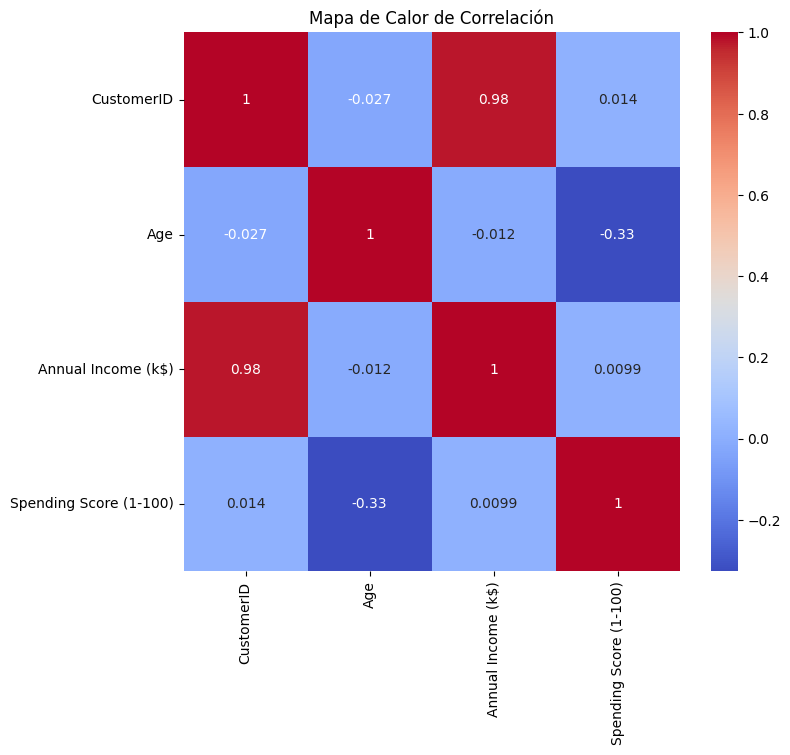

In [15]:
# Propósito: Visualizar la matriz de correlación para entender la relación entre variables numéricas.

# 1. Calcular la matriz de correlación
# - 'data.corr(numeric_only=True)': Calcula la correlación de Pearson entre todas las columnas numéricas.
correlation_matrix = data.corr(numeric_only=True)

# 2. Crear el gráfico (mapa de calor)
# - 'plt.figure(figsize=(8,7))': Define el tamaño de la figura para que sea más legible.
# - 'sns.heatmap()': Es la función de Seaborn para crear el mapa de calor.
#   - Parámetros de entrada:
#     - 'correlation_matrix': Los datos que queremos graficar.
#     - 'annot=True': Muestra los valores numéricos de la correlación en cada celda.
#     - 'cmap='coolwarm'': Define la paleta de colores. 'coolwarm' usa tonos rojos para correlaciones positivas y azules para negativas.
# - 'plt.show()': Muestra el gráfico generado.

plt.figure(figsize=(8,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlación")
plt.show()

# --- Interpretación de los Resultados ---
# Los valores varían de -1 a 1.
# - Cerca de 1: Fuerte correlación positiva (si una variable sube, la otra también).
# - Cerca de -1: Fuerte correlación negativa (si una sube, la otra baja).
# - Cerca de 0: Poca o ninguna correlación lineal.
# Observamos que no hay correlaciones fuertes entre las variables. Por ejemplo, la correlación entre 'Age' y 'Spending Score' es -0.33,
# lo que sugiere una relación negativa muy débil. Esto es importante para el clustering.

### 3.4 Distribución de Variables Numéricas

Los histogramas nos permiten ver la forma de la distribución de cada variable numérica.
* ¿Siguen una distribución normal (forma de campana)?
* ¿Están sesgadas hacia un lado?

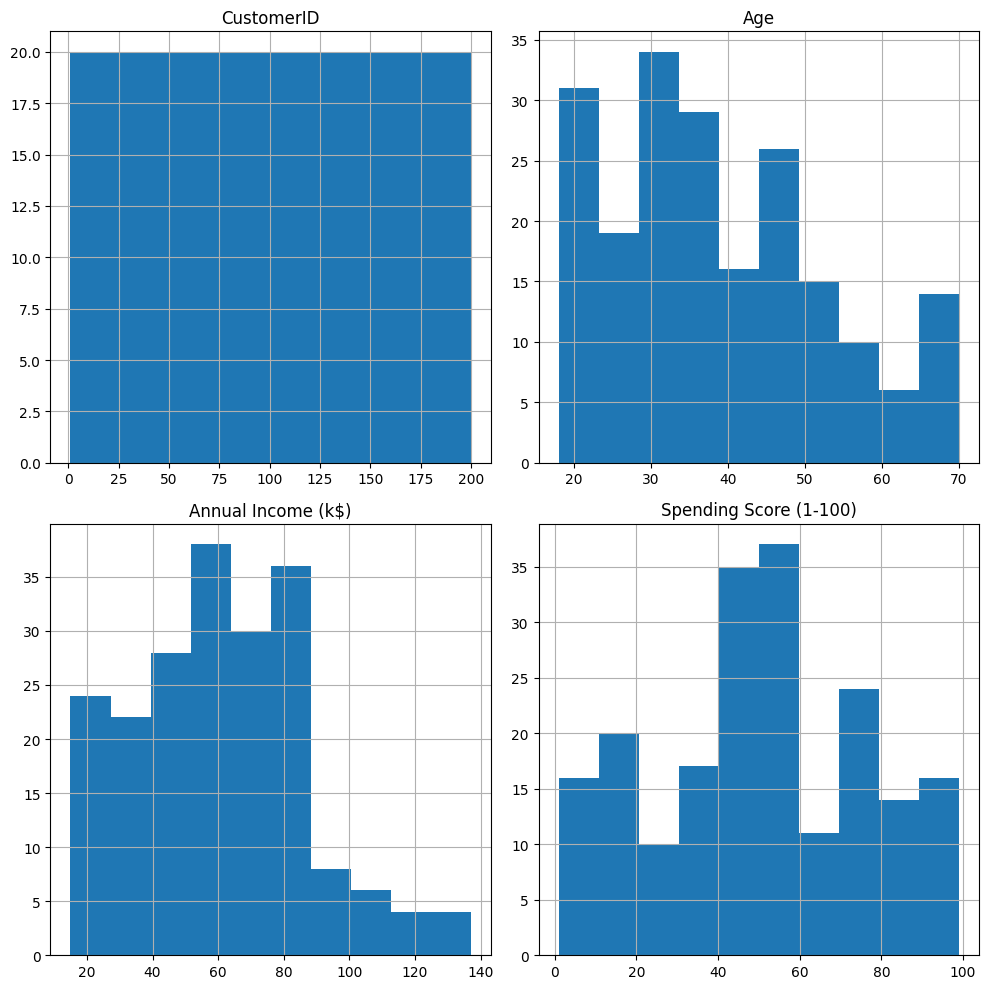

In [16]:
# Propósito: Crear un histograma para cada variable numérica para visualizar su distribución.

# - 'data.hist()': Esta función de pandas crea automáticamente los histogramas.
#   - Parámetros de entrada:
#     - 'figsize=(10, 10)': Define el tamaño total de la figura que contendrá todos los gráficos.
# - 'plt.show()': Muestra la figura.

data.hist(figsize=(10, 10))
plt.tight_layout() # Ajusta los gráficos para que no se superpongan
plt.show()

# --- Interpretación de los Resultados ---
# - Age: Muestra una distribución algo sesgada a la derecha, con una mayor concentración de clientes jóvenes.
# - Annual Income (k$): Parece tener una distribución bimodal (dos picos), lo que podría ser interesante.
# - Spending Score (1-100): Es bastante uniforme en el centro, indicando una amplia variedad de puntajes de gasto.
# - CustomerID: Es solo un identificador, por lo que su distribución uniforme no nos aporta información de comportamiento.

### 3.5 Distribución de Variables Categóricas

Finalmente, exploremos la única variable categórica que tenemos: 'Gender'. Un gráfico de barras es perfecto para ver el conteo de cada categoría.
* ¿Hay más clientes de un género que de otro?

Conteo por género:
Gender
Female    112
Male       88
Name: count, dtype: int64
\n--- Gráfico de Distribución ---


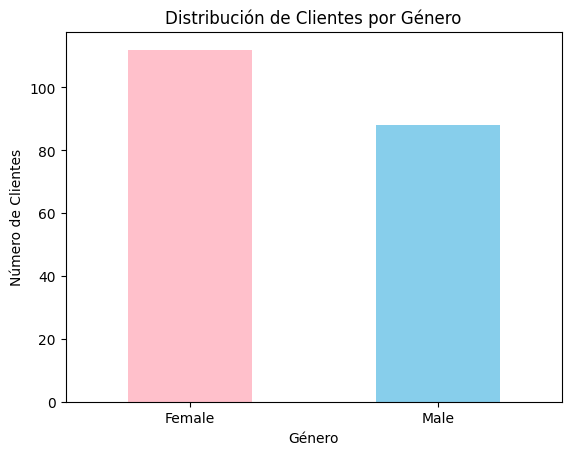

In [17]:
# Propósito: Contar y visualizar la distribución de la variable categórica 'Gender'.

# 1. Contar las ocurrencias de cada categoría
# - 'data['Gender'].value_counts()': Cuenta cuántas veces aparece cada valor único en la columna 'Gender'.
gender_counts = data['Gender'].value_counts()
print("Conteo por género:")
print(gender_counts)
print("\\n--- Gráfico de Distribución ---")

# 2. Crear el gráfico de barras
# - 'gender_counts.plot()': Llama a la función de graficado.
#   - Parámetros de entrada:
#     - 'kind='bar'': Especifica que queremos un gráfico de barras.
#     - 'rot=0': Mantiene las etiquetas del eje x en horizontal.
# - 'plt.title', 'plt.xlabel', 'plt.ylabel': Añaden etiquetas para que el gráfico sea fácil de entender.

gender_counts.plot(kind='bar', rot=0, color=['pink', 'skyblue'])
plt.title("Distribución de Clientes por Género")
plt.xlabel("Género")
plt.ylabel("Número de Clientes")
plt.show()

# --- Interpretación de los Resultados ---
# El resultado numérico y el gráfico nos muestran claramente que en este dataset hay más clientas (Female: 112) que clientes (Male: 88).
# Esta es una característica importante del conjunto de datos.

## Conclusiones del Análisis Exploratorio

¡Felicidades! Hemos completado un primer análisis exhaustivo de nuestros datos. Resumamos lo que hemos aprendido:

1.  **Calidad de los Datos:** El dataset está completo, con 200 registros y 5 columnas, y no tiene valores faltantes.
2.  **Perfil del Cliente:** La edad promedio es de ~39 años, y el ingreso anual promedio es de ~$60k.
3.  **Correlaciones:** No existen relaciones lineales fuertes entre edad, ingreso y puntaje de gasto. Esto indica que un modelo simple no podría predecir una variable a partir de otra.
4.  **Distribuciones:** Hemos observado las formas de distribución de cada variable, notando picos y sesgos que pueden ser relevantes.
5.  **Género:** Hay una ligera mayoría de clientas mujeres en la muestra.

El siguiente paso en un proyecto de clustering sería el **preprocesamiento de los datos** (como escalar las variables numéricas y codificar las categóricas) y luego aplicar un algoritmo como **K-Means** para encontrar los segmentos de clientes.

¿Te gustaría continuar con el siguiente paso?